# Tensorflow implementation:
GROKKING: GENERALIZATION BEYOND OVERFITTING ON SMALL ALGORITHMIC DATASETS

In [150]:
__Author__ = "Pradeep Pujari"
__Competition__ = "Kaggle ML Research Spotlight - July 2022"
__Version__ = "Part I - Synthetic Data Generation" 
__Paper__ = "https://arxiv.org/pdf/2201.02177v1.pdf"


## Table of Contents
1. [Overview](#Overview)
1. [Basic Setup](#Basic-Setup)
1. [Overfitting and early stopping](#Overfitting-and-early-stopping)
1. [Data Generation](#Data-Generation)
  1. [Binary Operations](#Binary_operations)
  1. [Double Descent](#double_descent)
1. [Closing remarks](#Closing-remarks)

## Overview


## Basic Setup

!pip install -r requirements.txt

In [129]:
from itertools import permutations, product
from math import factorial
import os
import random
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=4)
import itertools
from typing import Tuple, List
from x_transformers import TransformerWrapper, Decoder
from sympy.combinatorics.permutations import Permutation
from mod import Mod

In [130]:
DEFAULT_DATA_DIR = "./data"
num_elements = 5
prime=97
train_ratio=0.5
batch_size=512
num_workers=4
lr=1e-3
weight_decay=1
beta1=0.9
beta2=0.98
heads=4
layers=2
width=128

In [131]:
SEED = 10
random.seed(SEED)
tf.random.set_seed(SEED)

## Overfitting and early stopping
A major challenge in training neural networks is how long to train them.Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set.

A compromise is to train on the training dataset but to stop training at the point when performance on a validation dataset starts to degrade, training is then stopped before convergence to avoid the overfitting ("early stopping") This simple, effective, and widely used approach to training neural networks is called early stopping.Although, there are a number of plausible stopping criteria. As we see, choosing a stopping criterion predominantly involves a tradeoff between training
time and generalization error.


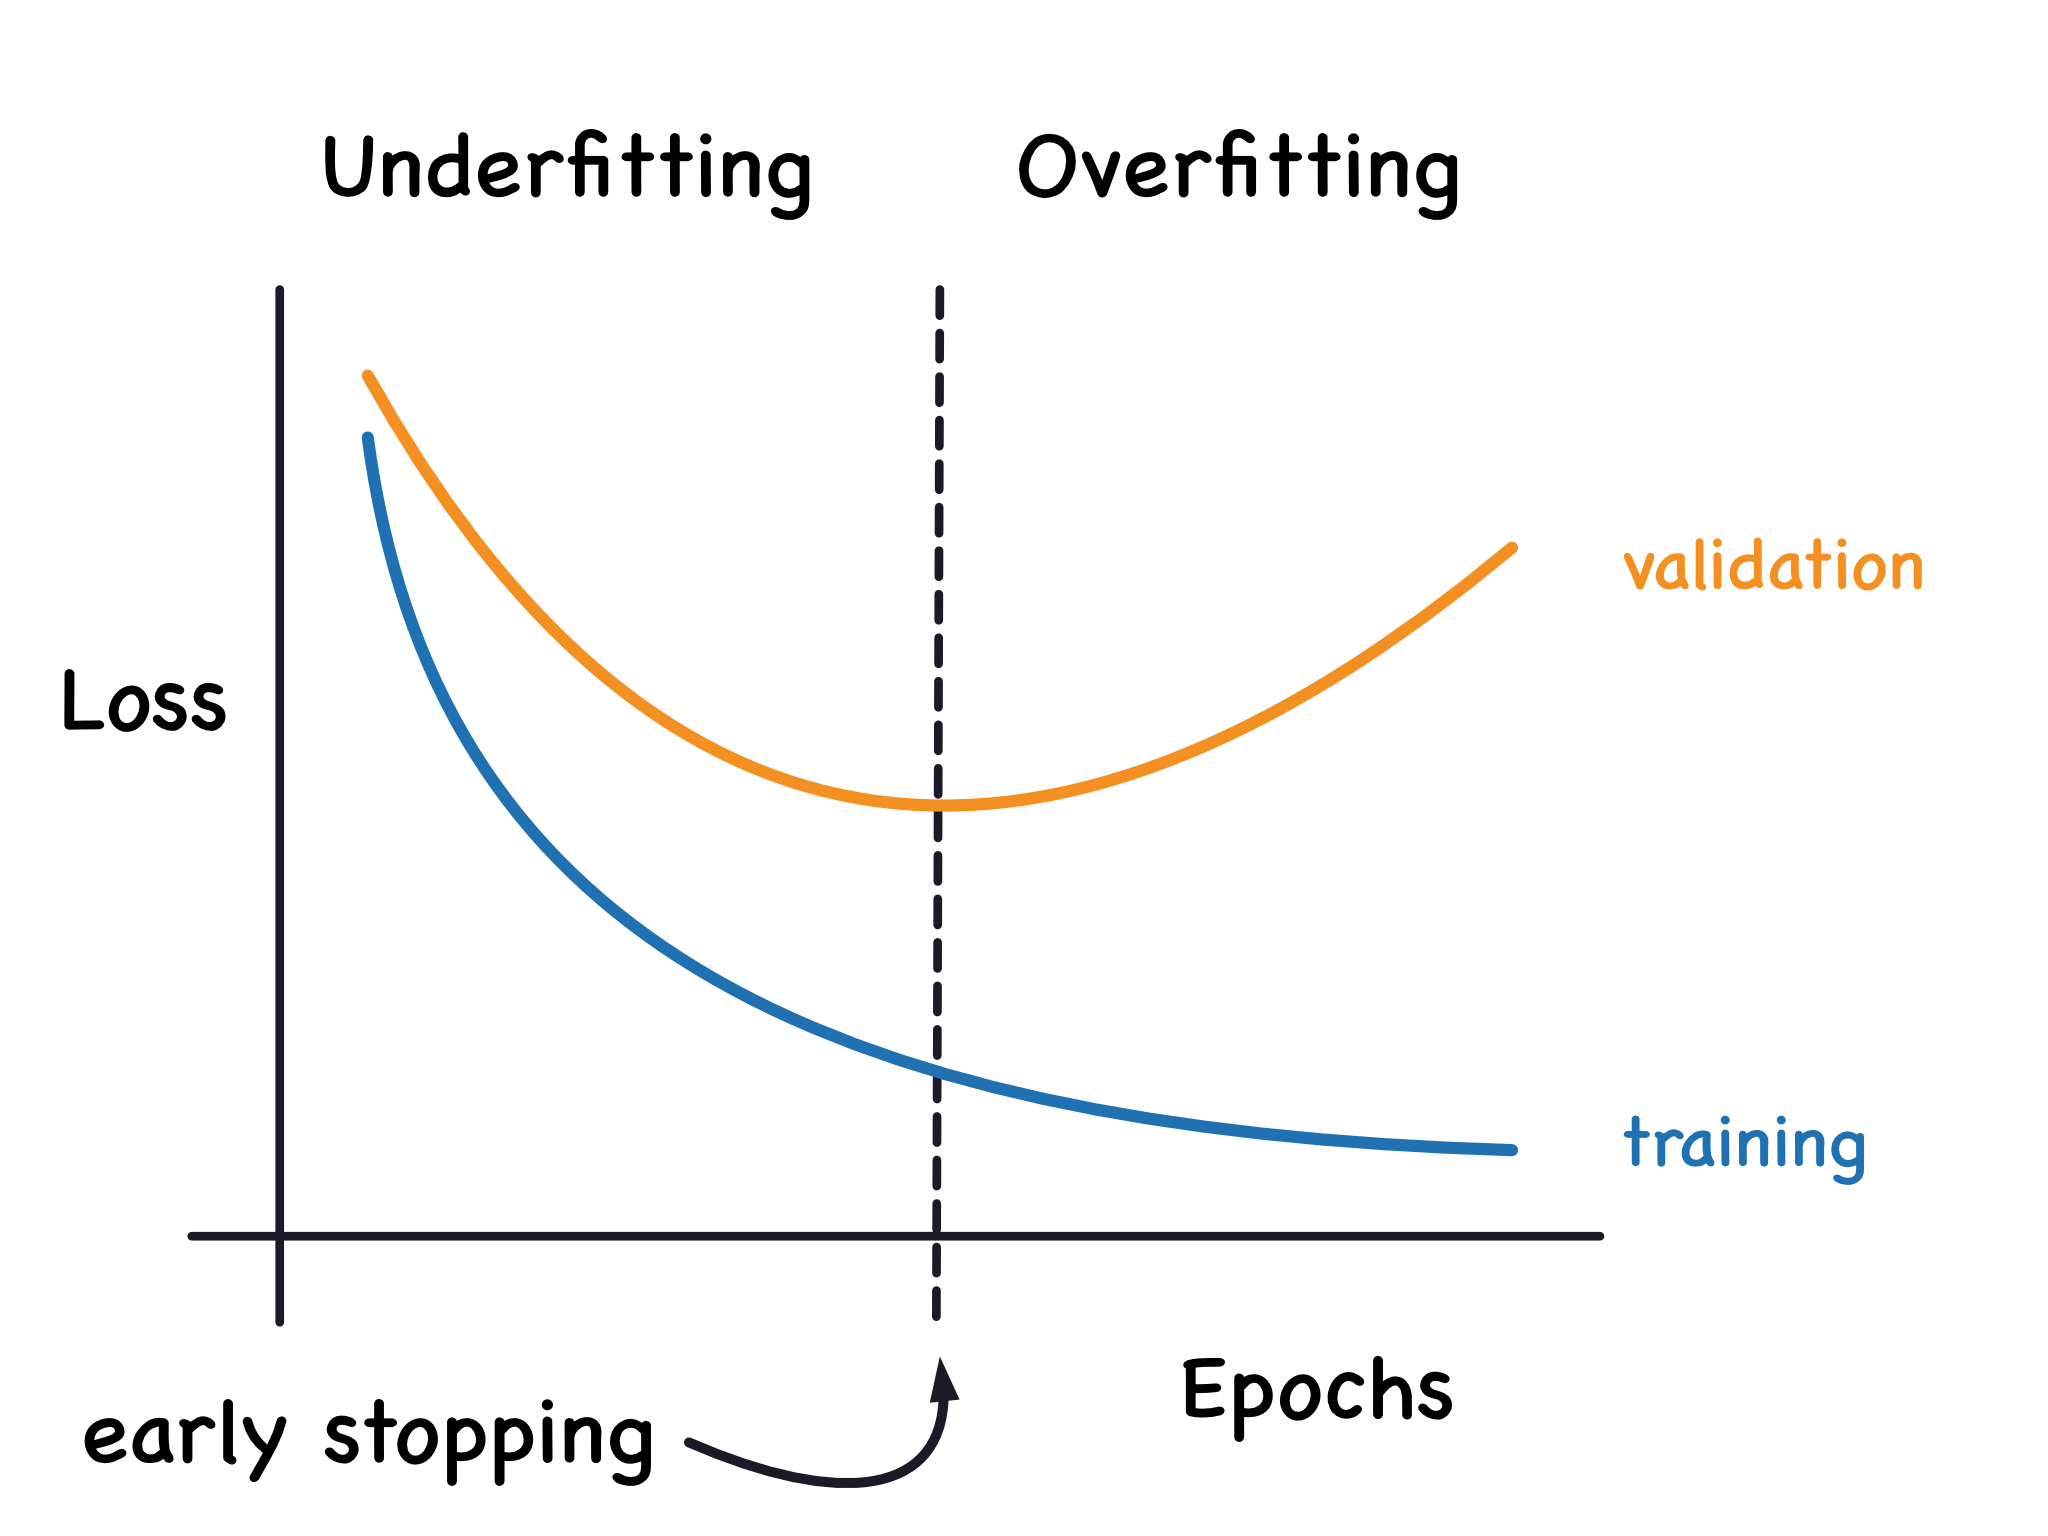

In [132]:
def is_prime(p):
    """"Checks whether p is a prime number
    pre-condition: p is a non-negative integer
    post-condition: return True if p is prime and False otherwise."""
    if p & 1 == 0:
        return False
    d = 3
    while d * d <= n:
        if p % d == 0:
            return False
        d = d + 2
    return True

In [133]:
# We can produce grokking effect with simple arithmetic operators. So, I have
#not considered all the unary and binary operators from paper
VALID_OPERATORS = {
    "+": "addition",
    "-": "subtraction",
    "*": "muliplication",
    "/": "division",
}

## Data Generation
There are two important criteria to see grokking phenomena. 1. The data should be programatically generated 2) Binary operations  
**Binary operations**
All of the experiments used a small transformer trained on datasets of equations of the form a ◦ b = c,where each of “a”, “◦”, “b”, “=”, and “c” is a separate token.
The following are the binary operations that we have tried (for a prime number p = 97):  
x ◦ y = x + y (mod p) for 0 ≤ x, y < p  
x ◦ y = x − y (mod p) for 0 ≤ x, y < p  
x ◦ y = x/y (mod p) for 0 ≤ x < p, 0 < y < p  

Since the operands are presented to the neural network as unrelated abstract symbols, the operations x+y (mod p−1) and x∗y (mod p) with a prime number p and non-zero x, y are indistinguishable from the neural network’s perspective (and similarly x − y (mod p − 1) and x/y (mod p)). This is because every nonzero residue modulo a prime, can be represented as a power of a primitive root. This representation shows the equivalence (up to renaming of symbols) of modular addition modulo p − 1 and modular  multiplication modulo p.

**Double descent**
Deep learning practitioners are used to seeing small improvements in validation accuracy after validation loss stops decreasing. A double descent of validation loss has been documented in some circumstances, but is considered unusual among practitioners Nakkiran et al.(2019); Belkin et al. (2018); d’Ascoli et al. (2020).
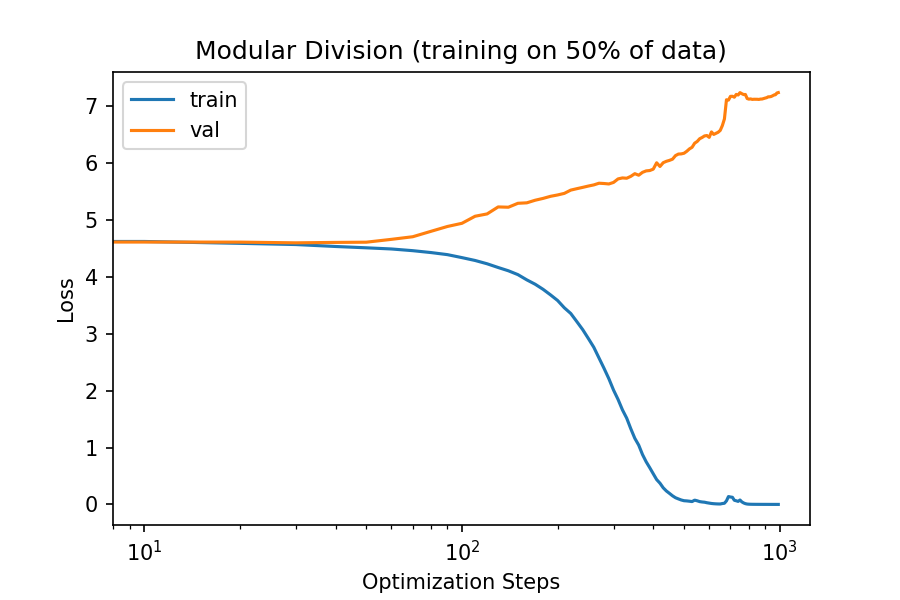


In [148]:
# "All of my experiments used a small transformer trained on datasets of
# equations of the form a◦b = c, where each of “a”, “◦”, “b”, “=”, and “c”
# is a seperate token"
def generate_binary_data(prime, operator, eq_token, op_token):
    """
    For example:
    x◦y = x/y (mod p) for 0 ≤ x < p, 0 < y < p
    """
    x = tf.range(prime)
    y = tf.range(1, prime)
    x, y = tf.meshgrid( x, y)
    eq = tf.ones_like(x) * eq_token
    op = tf.ones_like(x) * op_token
    
    if operator == '/':
        result = (x / y) % prime
        result=tf.dtypes.cast(result, tf.int32)
    elif operator == '+':
        result = x+y % prime
    elif operator == '-':
        result = x - y % prime
    else:
        result = (x * y) % prime

    return tf.stack([x, op, y, eq, result])

In [151]:
# data
for operator in VALID_OPERATORS:
    data = generate_binary_data(prime,operator,eq_token, op_token)
    #print(data)

## Closing remarks
This is part-I of the paper namely synthetic data generation. In part-II I will code the model. I have written code in pyTorch.I need to implement in TensorFlow. Some of the additional code is there for model training. It is seen that in the datasets,small algorithmic binary operation tables, effects such as double descent or late generalization, and improvements to generalization from interventions like weight decay can be important. This suggests that these datasets could be a good place to investigate aspects of generalization. 